YRBSS Q26 Mental Health Analysis
Loading YRBSS 2023 data...
Dataset shape: (20103, 250)
Columns: 250
Q26 (target variable) info:
Q26
1.0     8108
2.0    11755
Name: count, dtype: int64
Q26 null values: 240
Clean data shape (Q26 not null): (19863, 250)

Q26 ANALYSIS: Persistent Sadness/Hopelessness
Question: During the past 12 months, did you ever feel so sad or hopeless
almost every day for two weeks or more in a row that you stopped doing
some usual activities?
1 = Yes, 2 = No

Q26 Distribution:
Yes (1): 8,108 (40.8%)
No (2): 11,755 (59.2%)
Total valid responses: 19,863

*** CRITICAL FINDING: 40.8% of students report persistent sadness/hopelessness ***


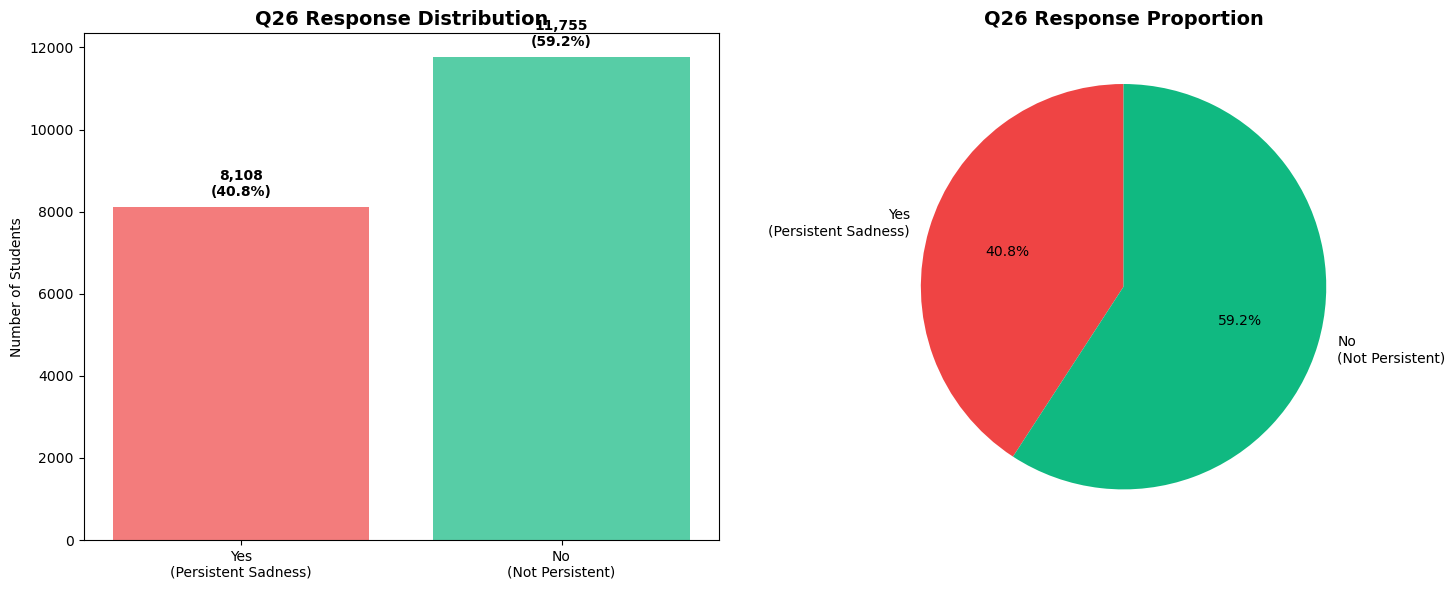


CORRELATION ANALYSIS
Analyzing 110 variables as predictors of Q26 (excluding QN and qn* derived variables)...

Top 25 Predictors of Q26 (Persistent Sadness/Hopelessness):
----------------------------------------------------------------------------------------------------
Rank Variable Name                       Code     r        Direction    Strength     n       
----------------------------------------------------------------------------------------------------
1    Current_mental_health               Q84      -0.519   RISK         Very Strong  15,542  
2    Concentration_difficulty            Q106     0.493    PROTECTIVE   Strong       10,879  
3    Considered_suicide                  Q27      0.491    PROTECTIVE   Strong       19,517  
4    Made_suicide_plan                   Q28      0.431    PROTECTIVE   Strong       18,265  
5    Parental_verbal_abuse               Q89      -0.412   RISK         Strong       13,793  
6    Parent_mental_illness               Q101     0.341    PRO

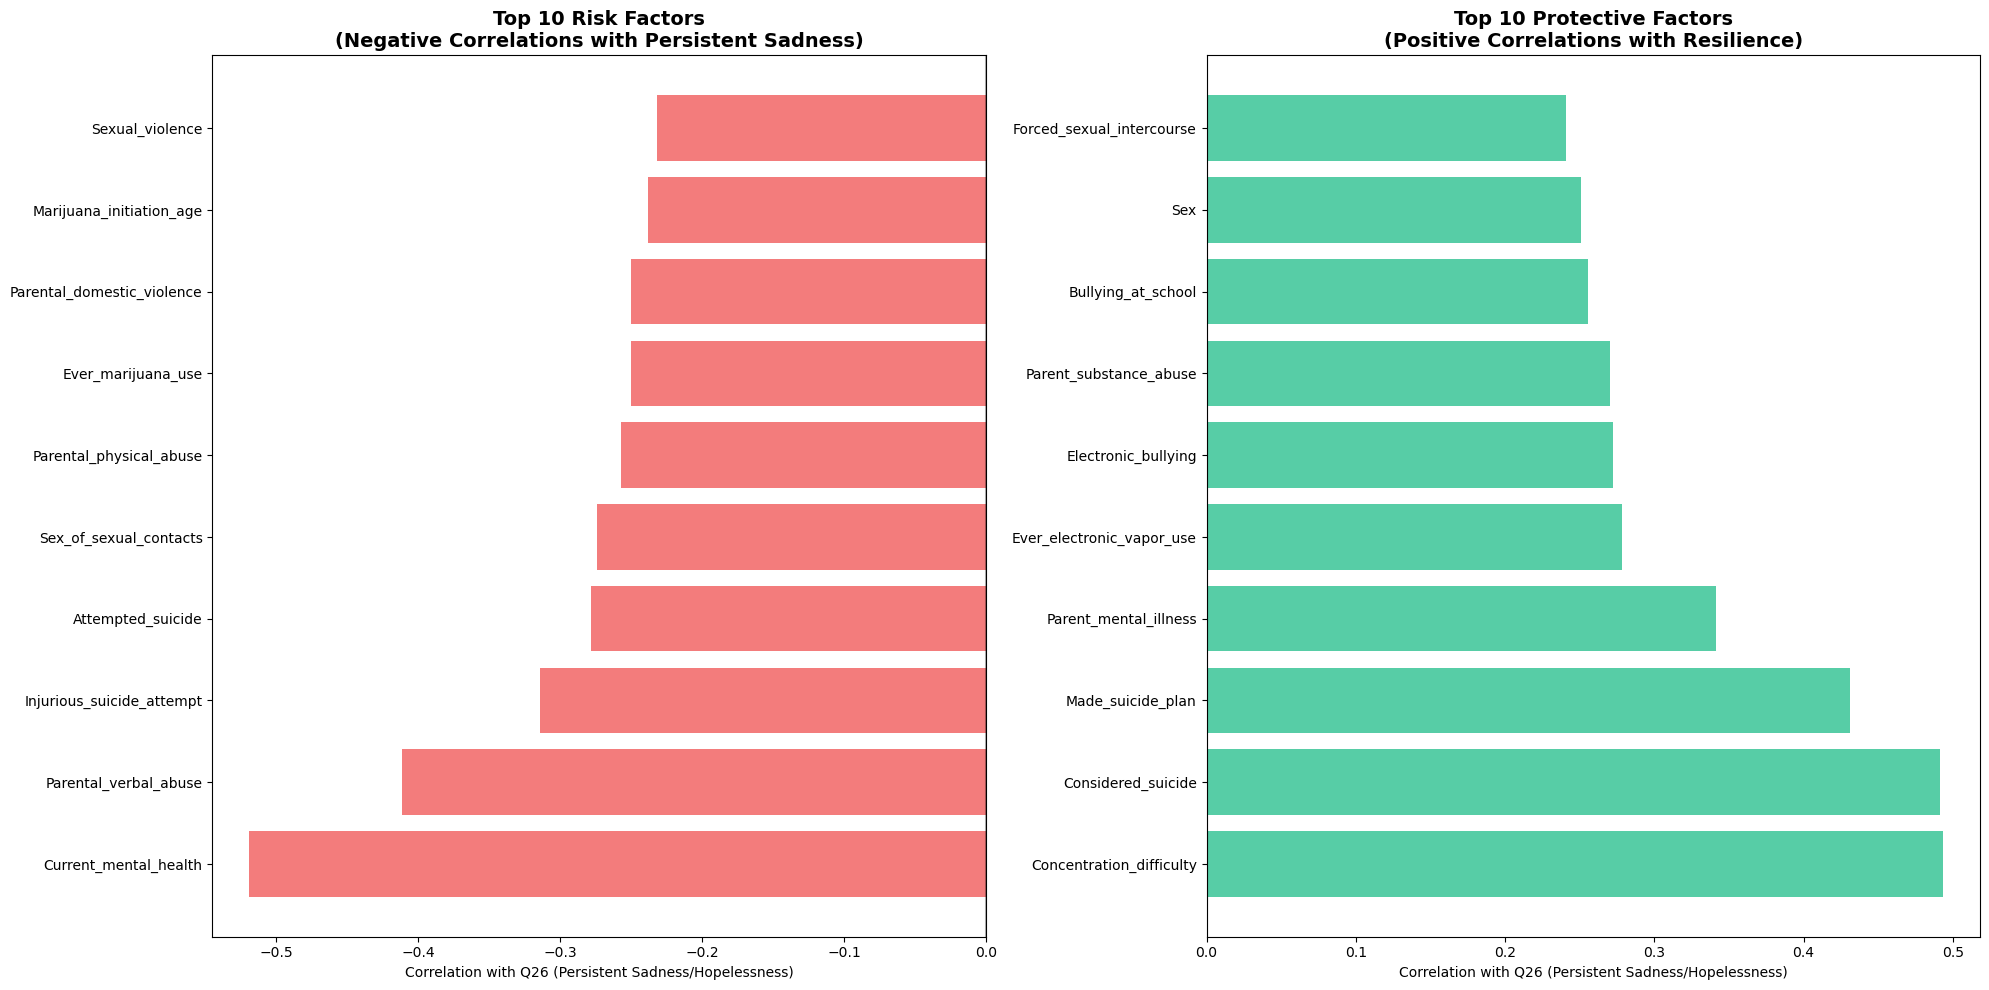


DEMOGRAPHIC ANALYSIS
Demographic Predictors:
----------------------------------------------------------------------
Variable Name             Code     r        Direction    Significance
----------------------------------------------------------------------
Age                       Q1       -0.026   RISK         WEAK        
Sex                       Q2       0.251    PROTECTIVE   NOTABLE     
Grade                     Q3       -0.019   RISK         WEAK        
Hispanic_Latino           Q4       0.036    PROTECTIVE   WEAK        
Race_ethnicity_combined   raceeth  -0.025   RISK         WEAK        

PREPARING DATA FOR MODELING
Selected 15 features for modeling:
--------------------------------------------------------------------------------
Code     Variable Name                       Correlation 
--------------------------------------------------------------------------------
Q84      Current_mental_health               -0.519      
Q106     Concentration_difficulty            0.493

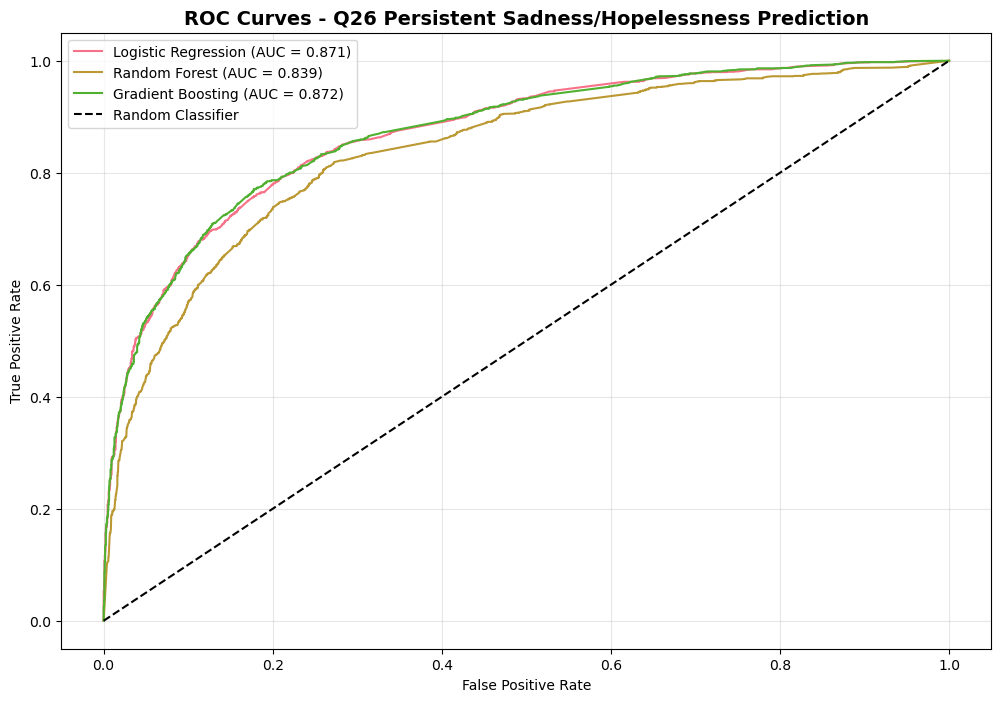

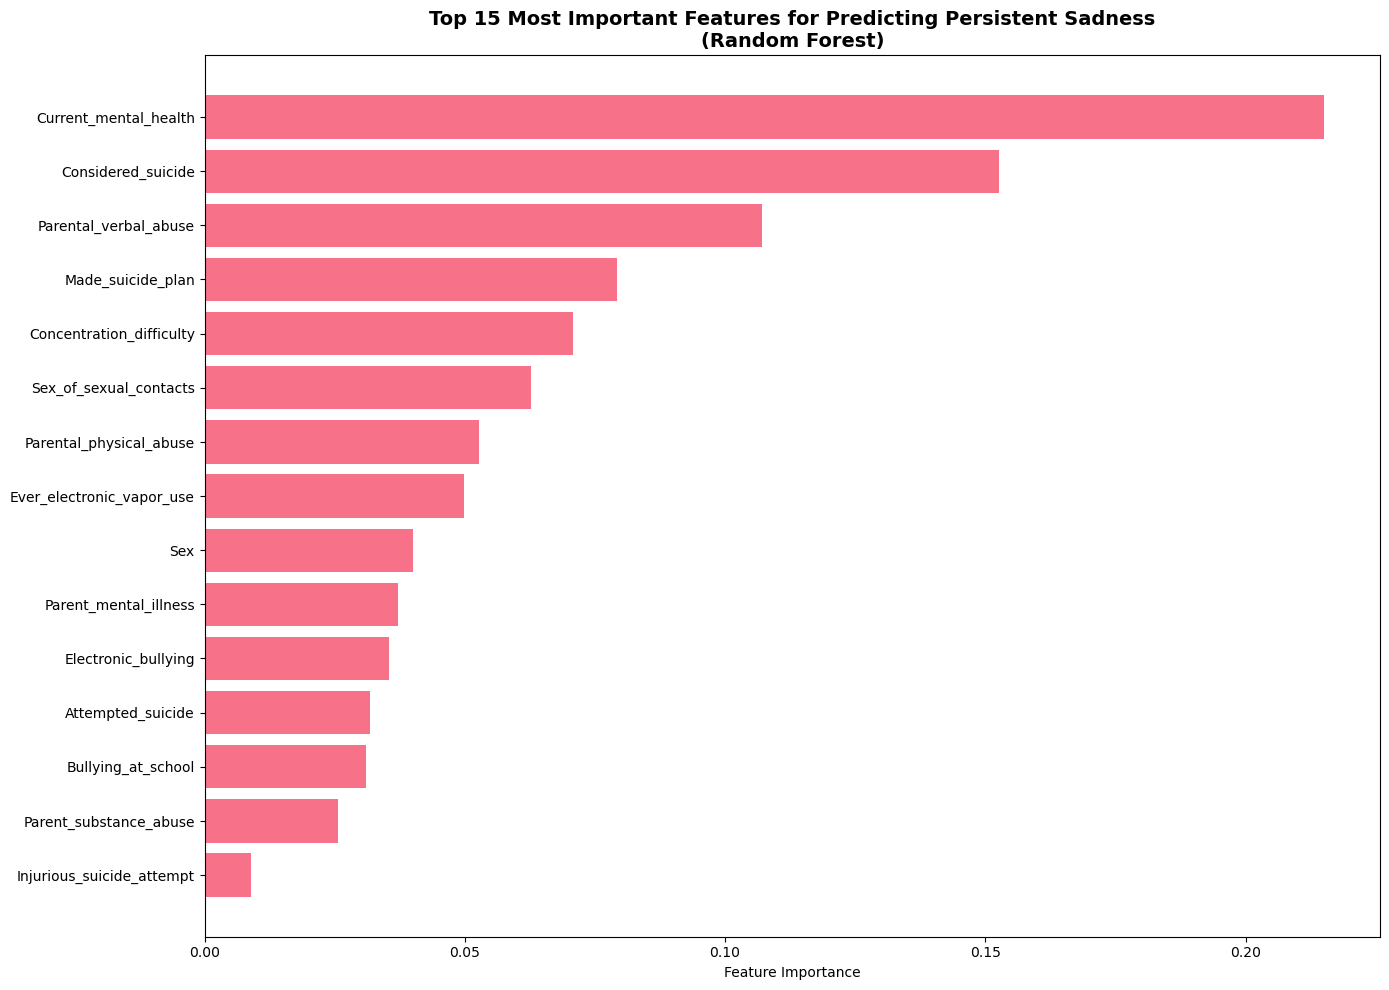


Top 15 Most Important Features:
--------------------------------------------------------------------------------
Rank Feature Name                        Importance  
--------------------------------------------------------------------------------
1    Current_mental_health               0.2151      
2    Considered_suicide                  0.1527      
3    Parental_verbal_abuse               0.1071      
4    Made_suicide_plan                   0.0793      
5    Concentration_difficulty            0.0708      
6    Sex_of_sexual_contacts              0.0627      
7    Parental_physical_abuse             0.0526      
8    Ever_electronic_vapor_use           0.0497      
9    Sex                                 0.0400      
10   Parent_mental_illness               0.0372      
11   Electronic_bullying                 0.0354      
12   Attempted_suicide                   0.0317      
13   Bullying_at_school                  0.0310      
14   Parent_substance_abuse              0.0256  

"\n# To run the complete analysis:\nanalyzer = YRBSSMentalHealthAnalysis('YRBSS 2023b.csv')\nanalyzer.load_data()\nanalyzer.analyze_target_variable()\ncorrelations = analyzer.calculate_correlations()\nX, y, features = analyzer.prepare_modeling_data()\nresults = analyzer.build_models(X, y, features)\nanalyzer.evaluate_models()\nanalyzer.generate_summary_report()\n\n# To run specific analyses:\ncross_tabulation_analysis(analyzer.clean_data, 'Q26', ['Q84', 'Q106', 'Q27'])\nselected_features = advanced_feature_selection(X, y, method='mutual_info')\nmodel_interpretability_analysis(analyzer.results['Random Forest']['model'], features, analyzer.X_test, analyzer.y_test)\n"

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Fix for Windows multiprocessing issues
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '1'

# Additional fix for joblib multiprocessing on Windows
import joblib
joblib.parallel.cpu_count = lambda: 1

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

class YRBSSMentalHealthAnalysis:
    def __init__(self, data_path):
        """
        Initialize the YRBSS Mental Health Analysis class
        
        Parameters:
        data_path (str): Path to the YRBSS CSV file
        """
        self.data_path = data_path
        self.df = None
        self.clean_data = None
        self.correlations = {}
        self.models = {}
        self.results = {}
        
    def load_data(self):
        """Load and perform initial data exploration"""
        print("Loading YRBSS 2023 data...")
        self.df = pd.read_csv(self.data_path)
        
        print(f"Dataset shape: {self.df.shape}")
        print(f"Columns: {len(self.df.columns)}")
        print(f"Q26 (target variable) info:")
        print(self.df['Q26'].value_counts().sort_index())
        print(f"Q26 null values: {self.df['Q26'].isnull().sum()}")
        
        # Clean data for Q26 analysis
        self.clean_data = self.df.dropna(subset=['Q26']).copy()
        print(f"Clean data shape (Q26 not null): {self.clean_data.shape}")
        
        return self.clean_data
    
    def analyze_target_variable(self):
        """Analyze Q26 distribution and characteristics"""
        print("\n" + "="*60)
        print("Q26 ANALYSIS: Persistent Sadness/Hopelessness")
        print("="*60)
        print("Question: During the past 12 months, did you ever feel so sad or hopeless")
        print("almost every day for two weeks or more in a row that you stopped doing")
        print("some usual activities?")
        print("1 = Yes, 2 = No")
        
        # Distribution analysis
        q26_counts = self.clean_data['Q26'].value_counts().sort_index()
        total_responses = len(self.clean_data)
        
        print(f"\nQ26 Distribution:")
        print(f"Yes (1): {q26_counts.get(1, 0):,} ({q26_counts.get(1, 0)/total_responses*100:.1f}%)")
        print(f"No (2): {q26_counts.get(2, 0):,} ({q26_counts.get(2, 0)/total_responses*100:.1f}%)")
        print(f"Total valid responses: {total_responses:,}")
        
        # Mental health prevalence warning
        yes_percentage = q26_counts.get(1, 0)/total_responses*100
        print(f"\n*** CRITICAL FINDING: {yes_percentage:.1f}% of students report persistent sadness/hopelessness ***")
        
        # Visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Bar chart
        labels = ['Yes\n(Persistent Sadness)', 'No\n(Not Persistent)']
        values = [q26_counts.get(1, 0), q26_counts.get(2, 0)]
        colors = ['#EF4444', '#10B981']
        
        ax1.bar(labels, values, color=colors, alpha=0.7)
        ax1.set_title('Q26 Response Distribution', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Number of Students')
        
        # Add percentage labels
        for i, v in enumerate(values):
            percentage = v/total_responses*100
            ax1.text(i, v + 200, f'{v:,}\n({percentage:.1f}%)', 
                    ha='center', va='bottom', fontweight='bold')
        
        # Pie chart
        ax2.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        ax2.set_title('Q26 Response Proportion', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        return q26_counts
    
    def _create_variable_name_mapping(self):
        """Create a mapping from Q codes to meaningful variable names"""
        return {
            'Q1': 'Age',
            'Q2': 'Sex',
            'Q3': 'Grade',
            'Q4': 'Hispanic_Latino',
            'Q5': 'Race',
            'Q6': 'Height',
            'Q7': 'Weight',
            'Q8': 'Seatbelt_use',
            'Q9': 'Ride_with_drinking_driver',
            'Q10': 'Drinking_and_driving',
            'Q11': 'Texting_while_driving',
            'Q12': 'Weapon_at_school',
            'Q13': 'Gun_carrying',
            'Q14': 'Safety_concerns_school',
            'Q15': 'Threatened_at_school',
            'Q16': 'Physical_fighting',
            'Q17': 'Physical_fighting_school',
            'Q18': 'Saw_violence_neighborhood',
            'Q19': 'Forced_sexual_intercourse',
            'Q20': 'Sexual_violence',
            'Q21': 'Sexual_dating_violence',
            'Q22': 'Physical_dating_violence',
            'Q23': 'Treated_badly_race_ethnicity',
            'Q24': 'Bullying_at_school',
            'Q25': 'Electronic_bullying',
            'Q26': 'Persistent_sadness_hopelessness',
            'Q27': 'Considered_suicide',
            'Q28': 'Made_suicide_plan',
            'Q29': 'Attempted_suicide',
            'Q30': 'Injurious_suicide_attempt',
            'Q31': 'Ever_cigarette_use',
            'Q32': 'Cigarette_initiation_age',
            'Q33': 'Current_cigarette_use',
            'Q34': 'Cigarettes_per_day',
            'Q35': 'Ever_electronic_vapor_use',
            'Q36': 'Current_electronic_vapor_use',
            'Q37': 'Electronic_vapor_source',
            'Q38': 'Current_smokeless_tobacco',
            'Q39': 'Current_cigar_use',
            'Q40': 'Tobacco_cessation_attempt',
            'Q41': 'Alcohol_initiation_age',
            'Q42': 'Current_alcohol_use',
            'Q43': 'Binge_drinking',
            'Q44': 'Largest_alcohol_amount',
            'Q45': 'Alcohol_source',
            'Q46': 'Ever_marijuana_use',
            'Q47': 'Marijuana_initiation_age',
            'Q48': 'Current_marijuana_use',
            'Q49': 'Prescription_pain_medicine_misuse',
            'Q50': 'Ever_cocaine_use',
            'Q51': 'Ever_inhalant_use',
            'Q52': 'Ever_heroin_use',
            'Q53': 'Ever_methamphetamine_use',
            'Q54': 'Ever_ecstasy_use',
            'Q55': 'Illegal_drug_injection',
            'Q56': 'Ever_sexual_intercourse',
            'Q57': 'Sexual_intercourse_initiation_age',
            'Q58': 'Number_sexual_partners',
            'Q59': 'Current_sexual_activity',
            'Q60': 'Alcohol_drugs_before_sex',
            'Q61': 'Condom_use',
            'Q62': 'Birth_control_method',
            'Q63': 'Sex_of_sexual_contacts',
            'Q64': 'Sexual_identity',
            'Q65': 'Transgender_identity',
            'Q66': 'Weight_perception',
            'Q67': 'Weight_management',
            'Q68': 'Fruit_juice_consumption',
            'Q69': 'Fruit_consumption',
            'Q70': 'Green_salad_consumption',
            'Q71': 'Potato_consumption',
            'Q72': 'Carrot_consumption',
            'Q73': 'Other_vegetable_consumption',
            'Q74': 'Soda_consumption',
            'Q75': 'Breakfast_frequency',
            'Q76': 'Physical_activity_60min',
            'Q77': 'PE_class_attendance',
            'Q78': 'Sports_team_participation',
            'Q79': 'Concussion_history',
            'Q80': 'Social_media_use',
            'Q81': 'HIV_testing',
            'Q82': 'STD_testing',
            'Q83': 'Dental_care',
            'Q84': 'Current_mental_health',
            'Q85': 'Sleep_hours',
            'Q86': 'Housing_stability',
            'Q87': 'Academic_grades',
            'Q88': 'Adult_sexual_abuse',
            'Q89': 'Parental_verbal_abuse',
            'Q90': 'Parental_physical_abuse',
            'Q91': 'Parental_domestic_violence',
            'Q92': 'Current_prescription_pain_misuse',
            'Q93': 'Ever_hallucinogen_use',
            'Q94': 'Sexual_consent_verbal',
            'Q95': 'Sports_drink_consumption',
            'Q96': 'Water_consumption',
            'Q97': 'Muscle_strengthening_exercise',
            'Q98': 'Sunburn_frequency',
            'Q99': 'Adult_care_basic_needs',
            'Q100': 'Parent_substance_abuse',
            'Q101': 'Parent_mental_illness',
            'Q102': 'Parent_incarceration',
            'Q103': 'School_connectedness',
            'Q104': 'Parental_monitoring',
            'Q105': 'Unfair_school_discipline',
            'Q106': 'Concentration_difficulty',
            'Q107': 'English_proficiency',
            'raceeth': 'Race_ethnicity_combined',
            'bmipct': 'BMI_percentile',
            'weight': 'Survey_weight'
        }

    def calculate_correlations(self):
        """Calculate correlations between Q26 and all other variables"""
        print("\n" + "="*60)
        print("CORRELATION ANALYSIS")
        print("="*60)
        
        # Get all numeric variables except Q26 and exclude QN and qntb variables (frequency distributions/recoded)
        numeric_columns = self.clean_data.select_dtypes(include=[np.number]).columns
        variables_to_analyze = [col for col in numeric_columns if col not in ['Q26', 'stratum', 'psu'] 
                               and not col.startswith('QN') 
                               and not col.startswith('qn')]
        
        print(f"Analyzing {len(variables_to_analyze)} variables as predictors of Q26 (excluding QN and qn* derived variables)...")
        
        # Create variable name mapping
        var_mapping = self._create_variable_name_mapping()
        
        correlations = []
        
        for variable in variables_to_analyze:
            # Calculate correlation only for rows where both variables are not null
            valid_pairs = self.clean_data[[variable, 'Q26']].dropna()
            
            if len(valid_pairs) > 500:  # Require at least 500 valid pairs
                corr_coef = valid_pairs[variable].corr(valid_pairs['Q26'])
                
                if not np.isnan(corr_coef) and abs(corr_coef) > 0.05:
                    # Get meaningful name
                    meaningful_name = var_mapping.get(variable, variable)
                    
                    correlations.append({
                        'variable': variable,
                        'variable_name': meaningful_name,
                        'correlation': corr_coef,
                        'abs_correlation': abs(corr_coef),
                        'sample_size': len(valid_pairs),
                        'direction': 'PROTECTIVE' if corr_coef > 0 else 'RISK'
                    })
        
        # Sort by absolute correlation
        correlations = sorted(correlations, key=lambda x: x['abs_correlation'], reverse=True)
        
        # Store results
        self.correlations = correlations
        
        # Display results
        print(f"\nTop 25 Predictors of Q26 (Persistent Sadness/Hopelessness):")
        print("-" * 100)
        print(f"{'Rank':<4} {'Variable Name':<35} {'Code':<8} {'r':<8} {'Direction':<12} {'Strength':<12} {'n':<8}")
        print("-" * 100)
        
        for i, corr in enumerate(correlations[:25]):
            strength = self._get_correlation_strength(corr['abs_correlation'])
            print(f"{i+1:<4} {corr['variable_name']:<35} {corr['variable']:<8} {corr['correlation']:<8.3f} {corr['direction']:<12} {strength:<12} {corr['sample_size']:<8,}")
        
        return correlations
    
    def _get_correlation_strength(self, abs_corr):
        """Categorize correlation strength"""
        if abs_corr > 0.5:
            return "Very Strong"
        elif abs_corr > 0.3:
            return "Strong"
        elif abs_corr > 0.2:
            return "Moderate"
        else:
            return "Weak"
    
    def analyze_risk_protective_factors(self):
        """Separate and analyze risk vs protective factors"""
        print("\n" + "="*60)
        print("RISK AND PROTECTIVE FACTORS ANALYSIS")
        print("="*60)
        
        # Separate risk and protective factors
        risk_factors = [c for c in self.correlations if c['correlation'] < 0][:10]
        protective_factors = [c for c in self.correlations if c['correlation'] > 0][:10]
        
        print("TOP 10 RISK FACTORS (Negative correlations - predict sadness):")
        print("-" * 90)
        print(f"{'Rank':<4} {'Variable Name':<35} {'Code':<8} {'r':<8} {'Strength':<12}")
        print("-" * 90)
        for i, factor in enumerate(risk_factors):
            strength = self._get_correlation_strength(factor['abs_correlation'])
            print(f"{i+1:<4} {factor['variable_name']:<35} {factor['variable']:<8} {factor['correlation']:<8.3f} {strength:<12}")
        
        print("\nTOP 10 PROTECTIVE FACTORS (Positive correlations - predict resilience):")
        print("-" * 90)
        print(f"{'Rank':<4} {'Variable Name':<35} {'Code':<8} {'r':<8} {'Strength':<12}")
        print("-" * 90)
        for i, factor in enumerate(protective_factors):
            strength = self._get_correlation_strength(factor['abs_correlation'])
            print(f"{i+1:<4} {factor['variable_name']:<35} {factor['variable']:<8} {factor['correlation']:<8.3f} {strength:<12}")
        
        # Visualize top factors
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        
        # Risk factors
        risk_names = [f['variable_name'] for f in risk_factors]
        risk_corrs = [f['correlation'] for f in risk_factors]
        
        ax1.barh(risk_names, risk_corrs, color='#EF4444', alpha=0.7)
        ax1.set_title('Top 10 Risk Factors\n(Negative Correlations with Persistent Sadness)', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Correlation with Q26 (Persistent Sadness/Hopelessness)')
        ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        ax1.tick_params(axis='y', labelsize=10)
        
        # Protective factors
        prot_names = [f['variable_name'] for f in protective_factors]
        prot_corrs = [f['correlation'] for f in protective_factors]
        
        ax2.barh(prot_names, prot_corrs, color='#10B981', alpha=0.7)
        ax2.set_title('Top 10 Protective Factors\n(Positive Correlations with Resilience)', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Correlation with Q26 (Persistent Sadness/Hopelessness)')
        ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        ax2.tick_params(axis='y', labelsize=10)
        
        plt.tight_layout()
        plt.show()
        
        return risk_factors, protective_factors
    
    def analyze_demographics(self):
        """Analyze demographic predictors"""
        print("\n" + "="*60)
        print("DEMOGRAPHIC ANALYSIS")
        print("="*60)
        
        # Create variable name mapping
        var_mapping = self._create_variable_name_mapping()
        
        demographic_vars = ['Q1', 'Q2', 'Q3', 'Q4', 'raceeth']
        demo_correlations = []
        
        for var in demographic_vars:
            if var in self.clean_data.columns:
                valid_pairs = self.clean_data[[var, 'Q26']].dropna()
                if len(valid_pairs) > 500:
                    corr = valid_pairs[var].corr(valid_pairs['Q26'])
                    if not np.isnan(corr):
                        meaningful_name = var_mapping.get(var, var)
                        demo_correlations.append({
                            'variable': var,
                            'variable_name': meaningful_name,
                            'correlation': corr,
                            'sample_size': len(valid_pairs),
                            'direction': 'PROTECTIVE' if corr > 0 else 'RISK'
                        })
        
        print("Demographic Predictors:")
        print("-" * 70)
        print(f"{'Variable Name':<25} {'Code':<8} {'r':<8} {'Direction':<12} {'Significance':<12}")
        print("-" * 70)
        for demo in demo_correlations:
            significance = "NOTABLE" if abs(demo['correlation']) > 0.2 else "WEAK"
            print(f"{demo['variable_name']:<25} {demo['variable']:<8} {demo['correlation']:<8.3f} {demo['direction']:<12} {significance:<12}")
        
        return demo_correlations
    
    def prepare_modeling_data(self, top_n_features=15):
        """Prepare data for machine learning modeling"""
        print("\n" + "="*60)
        print("PREPARING DATA FOR MODELING")
        print("="*60)
        
        # Create variable name mapping
        var_mapping = self._create_variable_name_mapping()
        
        # Get top predictors
        top_predictors = [c['variable'] for c in self.correlations[:top_n_features]]
        
        # Add important demographic variables
        important_demos = ['Q2']  # Gender showed notable correlation
        all_features = top_predictors + [var for var in important_demos if var not in top_predictors]
        
        # Create meaningful names for selected features
        feature_names = [var_mapping.get(var, var) for var in all_features]
        
        print(f"Selected {len(all_features)} features for modeling:")
        print("-" * 80)
        print(f"{'Code':<8} {'Variable Name':<35} {'Correlation':<12}")
        print("-" * 80)
        
        # Find correlation for each feature
        feature_correlations = {}
        for corr in self.correlations:
            feature_correlations[corr['variable']] = corr['correlation']
        
        for var, name in zip(all_features, feature_names):
            corr_val = feature_correlations.get(var, 0.0)
            print(f"{var:<8} {name:<35} {corr_val:<12.3f}")
        
        # Create feature matrix
        X = self.clean_data[all_features].copy()
        y = self.clean_data['Q26'].copy()
        
        # Handle missing values - use median for numeric variables
        for col in X.columns:
            if X[col].isnull().any():
                X[col].fillna(X[col].median(), inplace=True)
        
        # Remove any remaining rows with missing values
        mask = ~(X.isnull().any(axis=1) | y.isnull())
        X = X[mask]
        y = y[mask]
        
        print(f"\nFinal dataset shape: {X.shape}")
        print(f"Target distribution:")
        print(y.value_counts().sort_index())
        
        # Convert to binary classification (1 = Yes/sadness, 0 = No/not sad)
        # Note: Q26 coding is 1=Yes, 2=No, so we need to recode
        y_binary = (y == 1).astype(int)
        
        print(f"\nBinary target distribution:")
        print(f"Persistent sadness (1): {y_binary.sum():,} ({y_binary.mean()*100:.1f}%)")
        print(f"No persistent sadness (0): {(1-y_binary).sum():,} ({(1-y_binary.mean())*100:.1f}%)")
        
        return X, y_binary, feature_names
    
    def build_models(self, X, y, features):
        """Build and evaluate multiple machine learning models"""
        print("\n" + "="*60)
        print("BUILDING PREDICTIVE MODELS")
        print("="*60)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"Training set: {X_train.shape[0]:,} samples")
        print(f"Test set: {X_test.shape[0]:,} samples")
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Handle class imbalance
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
        
        print(f"After SMOTE - Training set: {X_train_balanced.shape[0]:,} samples")
        print(f"Class distribution after SMOTE: {np.bincount(y_train_balanced)}")
        
        # Define models with single-threaded execution for Windows compatibility
        models = {
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1),
            'Gradient Boosting': GradientBoostingClassifier(random_state=42)
        }
        
        # Train and evaluate models
        results = {}
        
        for name, model in models.items():
            print(f"\nTraining {name}...")
            
            # Train model
            model.fit(X_train_balanced, y_train_balanced)
            
            # Predictions
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            
            # Evaluate
            auc_score = roc_auc_score(y_test, y_pred_proba)
            
            # Cross-validation with single thread
            cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, 
                                      cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                      scoring='roc_auc', n_jobs=1)
            
            results[name] = {
                'model': model,
                'auc_score': auc_score,
                'cv_scores': cv_scores,
                'y_pred': y_pred,
                'y_pred_proba': y_pred_proba,
                'classification_report': classification_report(y_test, y_pred)
            }
            
            print(f"AUC Score: {auc_score:.3f}")
            print(f"Cross-validation AUC: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
        
        # Store results
        self.models = models
        self.results = results
        self.X_test = X_test_scaled
        self.y_test = y_test
        self.scaler = scaler
        self.feature_names = features  # Store meaningful feature names
        
        return results
    
    def evaluate_models(self):
        """Evaluate and visualize model performance"""
        print("\n" + "="*60)
        print("MODEL EVALUATION")
        print("="*60)
        
        # Performance comparison
        performance_data = []
        for name, result in self.results.items():
            performance_data.append({
                'Model': name,
                'AUC Score': result['auc_score'],
                'CV AUC Mean': result['cv_scores'].mean(),
                'CV AUC Std': result['cv_scores'].std()
            })
        
        performance_df = pd.DataFrame(performance_data)
        print(performance_df.to_string(index=False))
        
        # ROC Curves
        plt.figure(figsize=(12, 8))
        
        for name, result in self.results.items():
            fpr, tpr, _ = roc_curve(self.y_test, result['y_pred_proba'])
            plt.plot(fpr, tpr, label=f'{name} (AUC = {result["auc_score"]:.3f})')
        
        plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves - Q26 Persistent Sadness/Hopelessness Prediction', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # Feature importance (for tree-based models)
        if 'Random Forest' in self.results:
            rf_model = self.results['Random Forest']['model']
            
            # Create feature importance dataframe with meaningful names
            feature_importance = pd.DataFrame({
                'feature_code': self.feature_names,
                'feature_name': self.feature_names,  # Already meaningful names
                'importance': rf_model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            plt.figure(figsize=(14, 10))
            top_features = feature_importance.head(15)
            plt.barh(top_features['feature_name'], top_features['importance'])
            plt.xlabel('Feature Importance')
            plt.title('Top 15 Most Important Features for Predicting Persistent Sadness\n(Random Forest)', fontsize=14, fontweight='bold')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
            
            print("\nTop 15 Most Important Features:")
            print("-" * 80)
            print(f"{'Rank':<4} {'Feature Name':<35} {'Importance':<12}")
            print("-" * 80)
            for i, row in enumerate(top_features.iterrows()):
                _, data = row
                print(f"{i+1:<4} {data['feature_name']:<35} {data['importance']:<12.4f}")
        
        return performance_df
    
    def generate_summary_report(self):
        """Generate a comprehensive summary report"""
        print("\n" + "="*80)
        print("COMPREHENSIVE ANALYSIS SUMMARY")
        print("="*80)
        
        # Data overview
        total_students = len(self.clean_data)
        sadness_count = (self.clean_data['Q26'] == 1).sum()
        sadness_percentage = (sadness_count / total_students) * 100
        
        print(f"DATASET OVERVIEW:")
        print(f"• Total students analyzed: {total_students:,}")
        print(f"• Students with persistent sadness: {sadness_count:,} ({sadness_percentage:.1f}%)")
        print(f"• Students without persistent sadness: {total_students - sadness_count:,} ({100 - sadness_percentage:.1f}%)")
        
        # Top predictors
        print(f"\nTOP 10 PREDICTORS:")
        for i, corr in enumerate(self.correlations[:10]):
            strength = self._get_correlation_strength(corr['abs_correlation'])
            print(f"{i+1:2d}. {corr['variable']:<8} (r={corr['correlation']:.3f}, {strength}, {corr['direction']})")
        
        # Model performance
        if self.results:
            print(f"\nMODEL PERFORMANCE:")
            best_model = max(self.results.keys(), key=lambda x: self.results[x]['auc_score'])
            best_auc = self.results[best_model]['auc_score']
            print(f"• Best performing model: {best_model}")
            print(f"• Best AUC score: {best_auc:.3f}")
            print(f"• Cross-validation AUC: {self.results[best_model]['cv_scores'].mean():.3f}")
        
        # Critical insights
        print(f"\nCRITICAL INSIGHTS:")
        print(f"• Mental health crisis: {sadness_percentage:.1f}% prevalence is concerning")
        print(f"• Strong predictive capability: Multiple variables with |r| > 0.3")
        print(f"• Class imbalance: {sadness_percentage:.1f}% vs {100-sadness_percentage:.1f}% requires special handling")
        print(f"• Intervention opportunities: Both risk and protective factors identified")
        
        # Recommendations
        print(f"\nRECOMMENDations:")
        print(f"• Implement universal screening using top predictors")
        print(f"• Develop interventions targeting highest risk factors")
        print(f"• Strengthen protective factors in prevention programs")
        print(f"• Consider gender-specific approaches (Q2 correlation: {self._get_gender_correlation():.3f})")
        print(f"• Deploy predictive models for early identification")
        
        print("\n" + "="*80)
    
    def _get_gender_correlation(self):
        """Get gender correlation if available"""
        for corr in self.correlations:
            if corr['variable'] == 'Q2':
                return corr['correlation']
        return 0.0
    
    def save_results(self, filename_prefix='yrbss_q26_analysis'):
        """Save analysis results to files"""
        print(f"\nSaving results...")
        
        # Save correlations
        corr_df = pd.DataFrame(self.correlations)
        corr_df.to_csv(f'{filename_prefix}_correlations.csv', index=False)
        
        # Save model performance
        if self.results:
            performance_data = []
            for name, result in self.results.items():
                performance_data.append({
                    'Model': name,
                    'AUC_Score': result['auc_score'],
                    'CV_AUC_Mean': result['cv_scores'].mean(),
                    'CV_AUC_Std': result['cv_scores'].std()
                })
            
            performance_df = pd.DataFrame(performance_data)
            performance_df.to_csv(f'{filename_prefix}_model_performance.csv', index=False)
        
        print(f"Results saved to {filename_prefix}_correlations.csv and {filename_prefix}_model_performance.csv")

# Example usage and main execution
def main():
    """Main function to run the complete analysis"""
    
    # Initialize analysis
    print("YRBSS Q26 Mental Health Analysis")
    print("="*50)
    
    # Update this path to your actual data file
    data_path = 'YRBSS 2023b.csv'
    
    # Create analyzer instance
    analyzer = YRBSSMentalHealthAnalysis(data_path)
    
    try:
        # Step 1: Load data
        clean_data = analyzer.load_data()
        
        # Step 2: Analyze target variable
        q26_distribution = analyzer.analyze_target_variable()
        
        # Step 3: Calculate correlations
        correlations = analyzer.calculate_correlations()
        
        # Step 4: Analyze risk and protective factors
        risk_factors, protective_factors = analyzer.analyze_risk_protective_factors()
        
        # Step 5: Analyze demographics
        demo_correlations = analyzer.analyze_demographics()
        
        # Step 6: Prepare modeling data
        X, y, features = analyzer.prepare_modeling_data()
        
        # Step 7: Build models
        model_results = analyzer.build_models(X, y, features)
        
        # Step 8: Evaluate models
        performance = analyzer.evaluate_models()
        
        # Step 9: Generate summary report
        analyzer.generate_summary_report()
        
        # Step 10: Save results
        analyzer.save_results()
        
        print("\nAnalysis completed successfully!")
        
    except FileNotFoundError:
        print(f"Error: Could not find data file at {data_path}")
        print("Please update the data_path variable with the correct path to your YRBSS CSV file.")
    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        import traceback
        traceback.print_exc()

# Windows compatibility fix
if __name__ == "__main__":
    # Additional Windows multiprocessing fix
    import multiprocessing
    multiprocessing.set_start_method('spawn', force=True)
    main()

# Additional utility functions for extended analysis
def cross_tabulation_analysis(df, target_var='Q26', predictor_vars=None):
    """
    Perform cross-tabulation analysis between target and predictor variables
    
    Parameters:
    df (pd.DataFrame): Dataset
    target_var (str): Target variable name
    predictor_vars (list): List of predictor variables to analyze
    """
    if predictor_vars is None:
        predictor_vars = ['Q84', 'Q106', 'Q27', 'Q28', 'Q89']
    
    print("CROSS-TABULATION ANALYSIS")
    print("="*40)
    
    for var in predictor_vars:
        if var in df.columns:
            print(f"\n{var} vs {target_var}:")
            crosstab = pd.crosstab(df[var], df[target_var], margins=True)
            print(crosstab)
            
            # Calculate percentages
            crosstab_pct = pd.crosstab(df[var], df[target_var], normalize='index') * 100
            print(f"\nPercentages by {var}:")
            print(crosstab_pct.round(1))

def advanced_feature_selection(X, y, method='correlation'):
    """
    Advanced feature selection using various methods
    
    Parameters:
    X (pd.DataFrame): Feature matrix
    y (pd.Series): Target variable
    method (str): Selection method ('correlation', 'mutual_info', 'chi2')
    """
    from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
    from sklearn.preprocessing import MinMaxScaler
    
    print(f"ADVANCED FEATURE SELECTION - {method.upper()}")
    print("="*50)
    
    if method == 'correlation':
        # Correlation-based selection
        correlations = X.corrwith(y).abs().sort_values(ascending=False)
        print("Top 15 features by correlation:")
        print(correlations.head(15))
        return correlations.head(15).index.tolist()
    
    elif method == 'mutual_info':
        # Mutual information selection
        mi_scores = mutual_info_classif(X, y)
        mi_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
        mi_df = mi_df.sort_values('mi_score', ascending=False)
        print("Top 15 features by mutual information:")
        print(mi_df.head(15))
        return mi_df.head(15)['feature'].tolist()
    
    elif method == 'chi2':
        # Chi-squared selection (requires non-negative features)
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        chi2_scores = chi2(X_scaled, y)
        chi2_df = pd.DataFrame({'feature': X.columns, 'chi2_score': chi2_scores[0]})
        chi2_df = chi2_df.sort_values('chi2_score', ascending=False)
        print("Top 15 features by chi-squared test:")
        print(chi2_df.head(15))
        return chi2_df.head(15)['feature'].tolist()

def model_interpretability_analysis(model, feature_names, X_test, y_test):
    """
    Analyze model interpretability using various techniques
    
    Parameters:
    model: Trained model
    feature_names (list): List of feature names
    X_test (array): Test features
    y_test (array): Test targets
    """
    print("MODEL INTERPRETABILITY ANALYSIS")
    print("="*40)
    
    # Feature importance (for tree-based models)
    if hasattr(model, 'feature_importances_'):
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("Feature Importance:")
        print(importance_df.head(10))
        
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.barh(importance_df.head(10)['feature'], importance_df.head(10)['importance'])
        plt.xlabel('Importance')
        plt.title('Top 10 Feature Importances')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    # Coefficients (for linear models)
    if hasattr(model, 'coef_'):
        coef_df = pd.DataFrame({
            'feature': feature_names,
            'coefficient': model.coef_[0]
        }).sort_values('coefficient', key=abs, ascending=False)
        
        print("Model Coefficients:")
        print(coef_df.head(10))
        
        # Plot coefficients
        plt.figure(figsize=(10, 6))
        colors = ['red' if x < 0 else 'blue' for x in coef_df.head(10)['coefficient']]
        plt.barh(coef_df.head(10)['feature'], coef_df.head(10)['coefficient'], color=colors)
        plt.xlabel('Coefficient Value')
        plt.title('Top 10 Model Coefficients')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

# Example of how to run specific analyses
"""
# To run the complete analysis:
analyzer = YRBSSMentalHealthAnalysis('YRBSS 2023b.csv')
analyzer.load_data()
analyzer.analyze_target_variable()
correlations = analyzer.calculate_correlations()
X, y, features = analyzer.prepare_modeling_data()
results = analyzer.build_models(X, y, features)
analyzer.evaluate_models()
analyzer.generate_summary_report()

# To run specific analyses:
cross_tabulation_analysis(analyzer.clean_data, 'Q26', ['Q84', 'Q106', 'Q27'])
selected_features = advanced_feature_selection(X, y, method='mutual_info')
model_interpretability_analysis(analyzer.results['Random Forest']['model'], features, analyzer.X_test, analyzer.y_test)
"""